In [1]:
import folium

In [2]:
from selenium import webdriver
import time, os

!export PATH="/home/jehyun/PycharmProjects/selenium/:$PATH"

def html2png(m,                     # foium map instance
             html_name,             # str. ex. 'testmap.html'
             png_name='map.png',    # str. ex. 'testmap.png'
             delay=5,               # int or float. ex. 10
             ):

  delay=delay
  fn = 'html/' + html_name
  tmpurl='file://{path}/{mapfile}'.format(path=os.getcwd(),mapfile=fn)
  m.save(fn)

  browser = webdriver.Firefox()
  browser.get(tmpurl)

  #Give the map tiles some time to load
  time.sleep(delay)
  browser.save_screenshot('./images/'+png_name)
  browser.quit()

In [3]:
# Nice representation of dataframe in markdown
import pandas as pd
import copy
from IPython.display import Markdown, display

def df2md(df, maxlen=20):
    _df = copy.deepcopy(df)
    
    for col in _df.columns:
        _df[col] = _df[col].astype('str')
        if (_df[col].str.len()> maxlen).any() :
            _df[col].loc[_df[col].str.len() > maxlen] = _df[col].str.slice(stop=maxlen) + ' ...'

    if '(index)' not in _df.columns:
        _df.insert(0, '(index)', df.index)
        
    fmt = ['---' for i in range(len(_df.columns))]
    df_fmt = pd.DataFrame([fmt], columns=_df.columns)
    df_formatted = pd.concat([df_fmt, _df])
    display(Markdown(df_formatted.to_csv(sep="|", index=False)))
    _df.drop(columns='(index)', axis=1, inplace=True)

In [7]:
df = pd.read_excel('NGL.xlsx')
df.drop(index=0, inplace=True)
df.reset_index(drop=True, inplace=True)
df2md(df.head())

(index)|gid|buld_se_cd|buld_se_nm|bdtyp_cd|apt_yn|gro_flo_co|sig_cd|sig_nm|emd_cd|emd_nm|tm_x|tm_y|lon|lat|buld_area|buld_elev|m01|m02|m03|m04|m05|m06|m07|m08|m09|m10|m11|m12|y17|st_m01|st_m02|st_m03|st_m04|st_m05|st_m06|st_m07|st_m08|st_m09|st_m10|st_m11|st_m12|st_y17
---|---|---|---|---|---|---|---|---|---|---|---|---|---|---|---|---|---|---|---|---|---|---|---|---|---|---|---|---|---|---|---|---|---|---|---|---|---|---|---|---|---|---
0|24300|0|지상|4299|N|1|30110|동구|30110137|대별동|241302.419829207|409864.414379324|127.459746194608|36.2858798245272|199.109760164108|80|61.587998174704|76.368132857176|108.372413947032|130.399191728005|153.301471581826|138.981246232986|94.1192299952874|116.160557618508|107.075909293615|76.0582836270332|63.2461349872442|57.7913106771616|1183.46187899663|77.4414291381836|97.5647354125977|136.456909179688|159.853820800781|181.146118164063|161.53076171875|109.31169128418|138.931045532227|133.254684448242|95.6145782470703|80.3922271728516|72.975700378418|1444.47375488281
1|16295|0|지상|1001|N|1|30110|동구|30110105|가오동|240815.01297069|412384.958080419|127.454452653456|36.3086147051094|77.3923177693719|71|54.6587660438136|74.3240604024184|109.983418941498|131.021371841431|148.915192252711|136.026762912148|91.4622986442164|112.346493419848|109.010571178637|75.9642522084086|59.7529277174096|48.7103261571181|1152.17643617329|77.5996551513672|96.7234191894531|136.413635253906|159.390518188477|180.87614440918|165.518310546875|112.231346130371|137.366897583008|134.195907592773|96.3771133422852|79.9522476196289|72.7179718017578|1449.36315917969
2|24341|0|지상|1001|N|1|30110|동구|30110137|대별동|241460.822383503|410090.94543095|127.461521377075|36.2879144426327|91.0763856790575|77|62.304043189339|78.0388102324113|110.389678457509|130.250699416451|150.068157859471|135.022302627563|92.2708638232687|114.937465916509|108.497603748156|77.568351952926|64.5584099811056|58.3052325248718|1182.21162281866|77.4414291381836|97.5647354125977|136.456909179688|159.853820800781|181.146118164063|161.53076171875|109.31169128418|138.931045532227|133.254684448242|95.6145782470703|80.3922271728516|72.975700378418|1444.47375488281
3|24345|0|지상|4402|N|1|30110|동구|30110137|대별동|241530.22297262|410067.763074595|127.462292655181|36.2877025481814|51.2017056163047|78|48.6805400936692|60.6419043452651|86.4692395528158|105.063324045252|123.864551473547|112.271188029536|75.3915986661558|93.4298842041581|85.6682357434873|60.3520038746021|50.0022062372278|45.6562534349936|947.490926106771|77.4414291381836|97.5647354125977|136.456909179688|159.853820800781|181.146118164063|161.53076171875|109.31169128418|138.931045532227|133.254684448242|95.6145782470703|80.3922271728516|72.975700378418|1444.47375488281
4|24374|0|지상|18999|N|1|30110|동구|30110137|대별동|241500.967910986|409605.204042476|127.461942445015|36.2835354035404|455.844166700596|80|67.2504756116031|84.0601618833709|119.429690775118|141.218664905481|162.556833049707|146.167080444202|99.8334377941332|124.410167208889|117.419092797396|83.4298420412499|69.2576492167356|62.8880742809229|1277.92121626201|77.4414291381836|97.5647354125977|136.456909179688|159.853820800781|181.146118164063|161.53076171875|109.31169128418|138.931045532227|133.254684448242|95.6145782470703|80.3922271728516|72.975700378418|1444.47375488281


In [8]:
# 'gu' and dong' data in Korea
gu = f'https://raw.githubusercontent.com/jehyunlee/data-snippet/master/Korea_gu_20.json' 
dong = f'https://raw.githubusercontent.com/jehyunlee/data-snippet/master/Korea_dong_20.json' 

In [11]:
import json
import urllib.request

def read_webjson(url):
  with urllib.request.urlopen(url) as src:
    data = json.loads(src.read().decode(), encoding='utf-8')
    return data 

In [18]:
gu_data = read_webjson(gu)    # read 'gu' json from data-snippet

# read 'dong'
# For unknown reason, it is not possible to read from web.
dong_data = json.loads(open('./geojsons/Korea_dong_20.json', 'r', encoding='utf-8').read())

In [20]:
import numpy as np

df_dong = df.groupby(by='emd_nm').mean().reset_index()

# 'dong' filter : only Daejeon
dong_dj = {}
dong_dj_value = []
EMD_KOR_NM = []    # list of 'dong's

for key, value in dong_data.items():
  if key != 'features':
    dong_dj.update({key: value})
  else:
    for feature in dong_data['features']:
      properties = feature['properties']
      emd_cd = properties['EMD_CD']
      if emd_cd[:2] == '30':
        EMD_KOR_NM.append(properties['EMD_KOR_NM'])
        dong_dj_value.append(feature)
dong_dj['features'] = dong_dj_value

print('# of "dong"s in Daejeon = {}'.format(len(EMD_KOR_NM)))  # Wrong Value : Duplicates exist 
print(sorted(EMD_KOR_NM))  

# Find duplicates
import collections
print('\nDuplicates are {}'.format([item for item, count in collections.Counter(EMD_KOR_NM).items() if count > 1]))
EMD_KOR_NM = list(np.sort(np.unique(np.array(EMD_KOR_NM))))

print('\n# of  "dong"s in Daejeon = {}'.format(len(EMD_KOR_NM)))
print('List of  "dong"s in Daejeon = {}'.format(EMD_KOR_NM))

# Find missings in solar data
dong_solar = df_dong['emd_nm'].unique()
missing = []
for dong in EMD_KOR_NM:
  if dong not in dong_solar:
    missing.append(dong)
    
print('\nMissing "dong"s = {}'.format(missing))

# Save list of 'dong's in json format, including duplicates,
# because it is not important to treat them at the moment.
with open("dong_dj.json","w", encoding='utf-8') as jsonfile:
        json.dump(dong_dj,jsonfile,ensure_ascii=False)

# of "dong"s in Daejeon = 177
['가수원동', '가양동', '가오동', '가장동', '가정동', '갈마동', '갈전동', '갑동', '계산동', '관저동', '관평동', '괴곡동', '괴정동', '교촌동', '구도동', '구룡동', '구성동', '구암동', '구완동', '궁동', '금고동', '금동', '금탄동', '낭월동', '내동', '내탑동', '노은동', '대동', '대동', '대별동', '대사동', '대성동', '대정동', '대화동', '대흥동', '덕명동', '덕암동', '덕진동', '도룡동', '도마동', '도안동', '둔곡동', '둔산동', '마산동', '만년동', '매노동', '목달동', '목동', '목상동', '무수동', '문지동', '문창동', '문평동', '문화동', '미호동', '반석동', '방동', '방현동', '법동', '변동', '복수동', '복용동', '봉곡동', '봉명동', '봉산동', '부사동', '부수동', '비래동', '비룡동', '사성동', '사정동', '산성동', '산직동', '삼괴동', '삼성동', '삼정동', '삼정동', '상대동', '상서동', '상소동', '석교동', '석봉동', '선화동', '성남동', '성북동', '세동', '세천동', '소제동', '소호동', '송강동', '송정동', '송촌동', '수남동', '신대동', '신동', '신봉동', '신상동', '신성동', '신안동', '신일동', '신촌동', '신탄진동', '신하동', '신흥동', '안산동', '안영동', '어남동', '어은동', '연축동', '오동', '오동', '오류동', '오정동', '옥계동', '와동', '외삼동', '용계동', '용계동', '용두동', '용문동', '용산동', '용운동', '용전동', '용촌동', '용호동', '우명동', '원내동', '원동', '원신흥동', '원정동', '원촌동', '월평동', '유천동', '은행동', '읍내동', '이사동', '이현동', '인동', '자양동', '자운동', '장대

In [5]:
# map_osm = folium.Map(location=[37.566345, 126.977893])   # Seoul City Hall
# map_osm.save('./map1.html')      # Save map as html
# html2png(map_osm, 'map1.html', 'map1.png')  

In [21]:
# center of the map

lon_avg = df['lon'].mean()
lat_avg = df['lat'].mean()
print(lon_avg, lat_avg)

127.4013580315068 36.340743659590096


In [23]:
# 'gu' filter : only Daejeon
gu_dj = {}
gu_dj_value = []
SIG_KOR_NM = []    # list of 'gu's

for key, value in gu_data.items():
  if key != 'features':
    gu_dj.update({key: value})
  else:
    for feature in gu_data['features']:
      properties = feature['properties']
      sig_cd = properties['SIG_CD']
      if sig_cd[:2] == '30':
        SIG_KOR_NM.append(properties['SIG_KOR_NM'])
        gu_dj_value.append(feature)
gu_dj['features'] = gu_dj_value
        
print('# of "gu"s in Daejeon = {}'.format(len(SIG_KOR_NM)))
print(SIG_KOR_NM)        

# save list of 'gu's in json format
with open("gu_dj.json","w", encoding='utf-8') as jsonfile:
        json.dump(gu_dj,jsonfile,ensure_ascii=False)

# of "gu"s in Daejeon = 5
['동구', '중구', '서구', '유성구', '대덕구']


In [24]:
m = folium.Map(location=[lat_avg, lon_avg], zoom_start=11)

style_function_gu = {
                 'fillColor': 'white',
                 'color':'#000000FF'
                }

style_function_dong = {
                 'fillColor': 'white',
                 'color':'#0000FF66'
                }

folium.GeoJson(dong_dj, name='dong_dj',
               style_function=lambda x: style_function_dong        # style_function has to be a function which calls dictionary
              ).add_to(m)        # Overlay on map

folium.GeoJson(gu_dj, name='gu_dj',
               style_function=lambda x: style_function_gu        # style_function has to be a function which calls dictionary
              ).add_to(m)        # Overlay on map

folium.LayerControl().add_to(m)

html2png(m, 'dj_gudong.html', 'dj_gudong.png')

> https://stackoverflow.com/questions/56876620/unsure-how-to-use-colormap-with-folium-marker-plot  
> https://stackoverflow.com/questions/52911688/python-folium-choropleth-map-colors-incorrect/52981115#52981115  
> http://incredible.ai/code-snippet/2019/03/16/GeoHash-And-GeoPandas/

In [95]:
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np

def colorFader(c1,c2,mix=0): #fade (linear interpolate) from color c1 (at mix=0) to c2 (mix=1)
    c1=np.array(mpl.colors.to_rgb(c1))
    c2=np.array(mpl.colors.to_rgb(c2))
    return mpl.colors.to_hex((1-mix)*c1 + mix*c2)

c1='#1f77b4' #blue
c2='green' #green
n=5

colorFader(c1, c2, 0.2)

# fig, ax = plt.subplots(figsize=(8, 5))
# for x in range(n+1):
#     ax.axvline(x, color=colorFader(c1,c2,x/n), linewidth=4) 
# plt.show()

'#197990'

In [ ]:
import branca
import branca.colormap as cm
import random

def dj_datamap(df, 
               col, 
               legend = None, 
               datanum = None, 
               binmin = None,
               binmax = None,
               binstep = 5,
               colortype = 'linear'
              ):
    
    m = folium.Map(location=[lat_avg, lon_avg], 
                   tiles='CartoDB positron',
                   zoom_start=11)

    style_function_gu = {
                    'opacity': 0.7,
                    'weight':1,
                    'fillOpacity': 1,
                    'color': 'black',
                    'fillColor': 'white'
                    }
    
    style_function_dong = {
                    'opacity': 0.7,
                    'weight':1,
                    'fillOpacity': 0,
                    'color': 'gray',
                    'fillColor': 'white'
                    }

    folium.GeoJson(gu_dj, name='gu_dj',
                   style_function=lambda x: style_function_gu        # style_function has to be a function which calls dictionary
                  ).add_to(m)        # Overlay on map
    
    folium.GeoJson(dong_dj, name='dong_dj',
                   style_function=lambda x: style_function_dong        # style_function has to be a function which calls dictionary
                  ).add_to(m)        # Overlay on map

    if binmin == None:
        vmin = df[col].min()
    else:
        vmin = binmin
        
    if binmax == None:    
        vmax = df[col].max()
    else:
        vmax = binmax
    
    if datanum == None:
        datanum = df.shape[0]
    
    if colortype == 'linear':
        clrmap = cm.LinearColormap(colors=['orange', 'darkred'], vmin=vmin, vmax=vmax)
    elif colortype == 'step':
        colors = []
        for i in range(binstep):
            colors.append(colorFader('orange', 'darkred', i/(binstep-1)))
        clrmap = cm.StepColormap(colors=colors, vmin=vmin, vmax=vmax,
                                index=np.linspace(vmin, vmax, binstep))
        
    for idx in df.index[:datanum]:
        # Get longitude/latitude
        lon = df.at[idx, 'lon']
        lat = df.at[idx, 'lat']

        data = df.at[idx, col]
       
#         clrmap = cm.linear.YlOrRd_09.scale(vmin, vmax)
        folium.CircleMarker(
            location = [lat, lon],
            color='grey',
            fill_color=clrmap(data),
            fill_opacity=1,
            radius=1,
            weight=0
        ).add_to(m)
        
    if colortype == 'linear':
        clrmap = clrmap.to_step(index=np.linspace(vmin, vmax, num=binstep))
    elif colortype == 'step':
        pass
    
    if legend == None:
        legend = col
    
    clrmap.caption=legend
    clrmap.add_to(m)

    folium.LayerControl().add_to(m)
    
    filename = '{}_{}'.format(col, legend)
    html2png(m, '{}.html'.format(filename), '{}.png'.format(filename))
    
dj_datamap(df, 'buld_elev', 'building elevation', binmin=0, binmax=140, binstep=7, colortype='linear')

In [ ]:
help cm.StepColormap.

['#0000ff', '#2a00d4', '#5500aa', '#800080', '#aa0055', '#d4002a', '#ff0000']


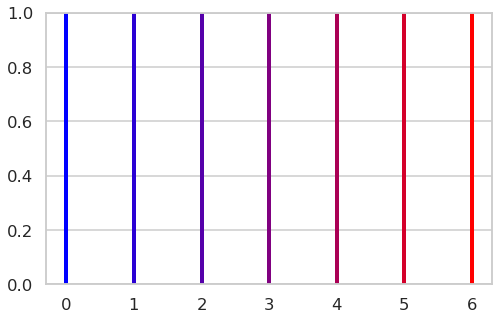

In [101]:
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np

def colorFader(c1,c2,mix=0): #fade (linear interpolate) from color c1 (at mix=0) to c2 (mix=1)
    c1=np.array(mpl.colors.to_rgb(c1))
    c2=np.array(mpl.colors.to_rgb(c2))
    return mpl.colors.to_hex((1-mix)*c1 + mix*c2)


c1='#1f77b4' #blue
c2='green' #green
n=500

c1='blue' #blue
c2='red' #green
n=7

colors = []
fig, ax = plt.subplots(figsize=(8, 5))
for x in range(n):
    color=colorFader(c1,c2,x/(n-1))
    colors.append(color)
    ax.axvline(x, color=color, linewidth=4) 
print(colors)
plt.show()

In [90]:
vmin = 0
vmax = 140
binstep = 3
np.linspace(vmin, vmax, binstep)

array([  0.,  70., 140.])

In [80]:
df2md(df.sort_values(by='buld_elev', ascending=False).iloc[:100].head())

(index)|gid|buld_se_cd|buld_se_nm|bdtyp_cd|apt_yn|gro_flo_co|sig_cd|sig_nm|emd_cd|emd_nm|tm_x|tm_y|lon|lat|buld_area|buld_elev|m01|m02|m03|m04|m05|m06|m07|m08|m09|m10|m11|m12|y17|st_m01|st_m02|st_m03|st_m04|st_m05|st_m06|st_m07|st_m08|st_m09|st_m10|st_m11|st_m12|st_y17
---|---|---|---|---|---|---|---|---|---|---|---|---|---|---|---|---|---|---|---|---|---|---|---|---|---|---|---|---|---|---|---|---|---|---|---|---|---|---|---|---|---|---
45317|8657|0|지상|3107|N|2|30110|동구|30110128|세천동|243167.760537706|411487.141186138|127.48059874402|36.3004215238615|76.3333515491909|575|59.1960113327225|72.8156640436742|106.121839696711|126.247478138317|146.098591296704|132.673018814681|89.9297339699485|112.885192276595|105.244334480979|74.6025159761503|59.9918846031288|54.2570498330252|1140.06335766285|77.2260513305664|96.7427291870117|136.106231689453|159.90901184082|180.379837036133|161.191116333008|106.464210510254|139.15071105957|133.185775756836|96.6957015991211|79.7661666870117|71.8738021850586|1438.69128417969
36773|41917|0|지상|4299|N|1|30140|중구|30140116|문화동|237831.912283041|411271.542688533|127.421184358405|36.298702657388|606.836168880608|347.799987792969|75.8446482408686|94.8981699477235|134.097933092328|155.951627725306|176.291706716977|159.269508596474|109.911490124483|136.895688763928|131.783262373145|95.9636654808694|78.6599818840388|71.5278693087846|1421.09559515824|77.9139862060547|97.6203765869141|137.545272827148|159.823013305664|180.038055419922|162.304946899414|111.662376403809|136.729461669922|135.041748046875|98.4623565673828|80.8455352783203|73.5569152832031|1451.54406738281
91089|41916|0|지상|1001|N|1|30140|중구|30140116|문화동|237821.54702186|411163.942895735|127.421063752826|36.2977334128005|115.909748213604|342|63.8173933896151|79.837764115767|116.62060695995|138.028853191029|158.948739485307|144.852684298429|100.594838887995|122.59380812211501|115.60644753196|82.0257727016102|66.0562601956454|60.5062062523582|1249.48940374201|77.9139862060547|97.6203765869141|137.545272827148|159.823013305664|180.038055419922|162.304946899414|111.662376403809|136.729461669922|135.041748046875|98.4623565673828|80.8455352783203|73.5569152832031|1451.54406738281
55598|16045|0|지상|1001|N|1|30110|동구|30110139|대성동|242491.67383133|411385.151590406|127.473066364893|36.2995324556271|93.6074493352146|339.200012207031|70.9378432432811|86.8900147808923|123.148049301571|145.51918665568|166.593916998969|150.453223440382|101.470054096646|128.684765762753|121.523468759325|87.2125075393253|72.5806320243412|68.1340221563975|1323.14764828152|77.3806381225586|97.0147171020508|136.49787902832|160.324569702148|181.134124755859|162.285675048828|108.505035400391|140.232376098633|134.137222290039|96.55029296875|80.0305709838867|72.6100921630859|1446.703125
55147|41918|0|지상|4203|N|1|30140|중구|30140116|문화동|237813.149535575|411203.489086494|127.420972181594|36.298090118207|179.914712253144|336.799987792969|68.8152080429925|86.2614735921224|123.099171045091|143.899188571506|163.509291797214|148.089511235555|102.419346809387|126.739382807414|121.268123732673|87.5867671754625|71.2993072933621|64.5867915365431|1307.57359720866|77.9139862060547|97.6203765869141|137.545272827148|159.823013305664|180.038055419922|162.304946899414|111.662376403809|136.729461669922|135.041748046875|98.4623565673828|80.8455352783203|73.5569152832031|1451.54406738281
